In [3]:
import sys
import os
import sympy as sp
import numpy as np

# Add the correct path to the P2 folder
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from gauss_fehlerfortpflanzung import evaluate_gaussian_error
from geraden_fit import geraden_fit
from scientific_error_rounder import runden_und_speichern
from mean_calc_w_err import err_weighted_mean
from data_handler import add_column_to_file

In [59]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import pandas as pd
import csv

In [8]:
var_names=[x, x2, B, G]=sp.symbols('x x2 B G')
formula_list=[
    1+(1/(B/G)),
    x
    ]
evaluate_gaussian_error('a_daten.txt',formulas=formula_list, variables=var_names, result_length=5,result_names=['1+(1/(B/G))', 'x[cm]'])

sqrt((0)**2 + (0)**2 + (-G*del_B/B**2)**2 + (del_G/B)**2)
sqrt((del_x)**2 + (0)**2 + (0)**2 + (0)**2)
Zeile 1: [1.43103, 0.02818, 14.6, 0.5]
Zeile 2: [1.32468, 0.01813, 14.0, 0.5]
Zeile 3: [1.26882, 0.01381, 13.9, 0.5]
Zeile 4: [1.16779, 0.00751, 13.6, 0.5]
Zeile 5: [1.14124, 0.00614, 13.4, 0.5]
Zeile 6: [1.69444, 0.06419, 16.3, 0.5]
Zeile 7: [1.89286, 0.10211, 17.1, 0.5]
Zeile 8: [1.53191, 0.04007, 15.0, 0.5]
Zeile 9: [1.22321, 0.01075, 13.7, 0.5]
Zeile 10: [1.11211, 0.00473, 13.5, 0.5]
Auswertung abgeschlossen. Ergebnisse wurden in 'a_daten_results.csv' gespeichert.


In [9]:
var_names=[x, x2, B, G]=sp.symbols('x x2 B G')
formula_list=[
    1+(B/G),
    x2,
    ]
evaluate_gaussian_error('a_daten.txt', output_file_suffix = 'results2', formulas=formula_list, variables=var_names, result_length=5,result_names=['1+(B/G)', 'x2[cm]'])

sqrt((0)**2 + (0)**2 + (del_B/G)**2 + (-B*del_G/G**2)**2)
sqrt((0)**2 + (del_x2)**2 + (0)**2 + (0)**2)
Zeile 1: [3.32, 0.1517, 13.4, 0.5]
Zeile 2: [4.08, 0.17198, 17.0, 0.5]
Zeile 3: [4.72, 0.19116, 20.1, 0.5]
Zeile 4: [6.96, 0.2669, 31.7, 0.5]
Zeile 5: [8.08, 0.30757, 37.6, 0.5]
Zeile 6: [2.44, 0.13311, 6.8, 0.5]
Zeile 7: [2.12, 0.12809, 7.9, 0.5]
Zeile 8: [2.88, 0.14162, 11.2, 0.5]
Zeile 9: [5.48, 0.21567, 24.3, 0.5]
Zeile 10: [9.92, 0.37644, 46.5, 0.5]
Auswertung abgeschlossen. Ergebnisse wurden in 'a_daten_results2.csv' gespeichert.


4.858746053657828 3.3791479997783447
Fit-Ergebnisse für 1:
Schwerpunkt: (1.347 ± 0.010, 14.3 ± 0.5)
Steigung: 4.8 ± 0.7
Y-Achsenabschnitt: 7.9 ± 1.0



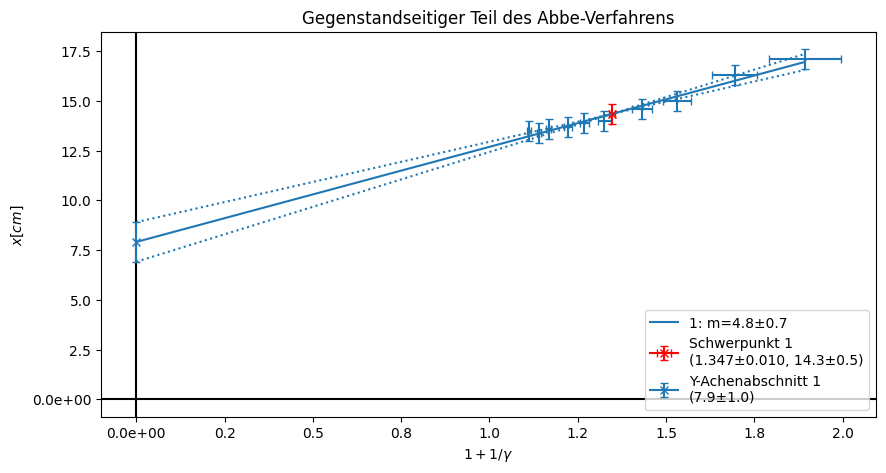

In [16]:
geraden_fit('a_daten_results.csv', title = 'Gegenstandseitiger Teil des Abbe-Verfahrens',
             y_label = r'$x[cm]$', x_label = r'$1+1/\gamma$', 
                save = True, focus_point = True, plot_x_inter = False, plot_errors=True, plot_y_inter=True, legendlocation = 'lower right'
            )

5.105629173897039 5.124676071052912
Fit-Ergebnisse für 1:
Schwerpunkt: (3.87 ± 0.18, 15.9 ± 0.5)
Steigung: 5.12 ± 0.18
Y-Achsenabschnitt: -4.0 ± 0.8



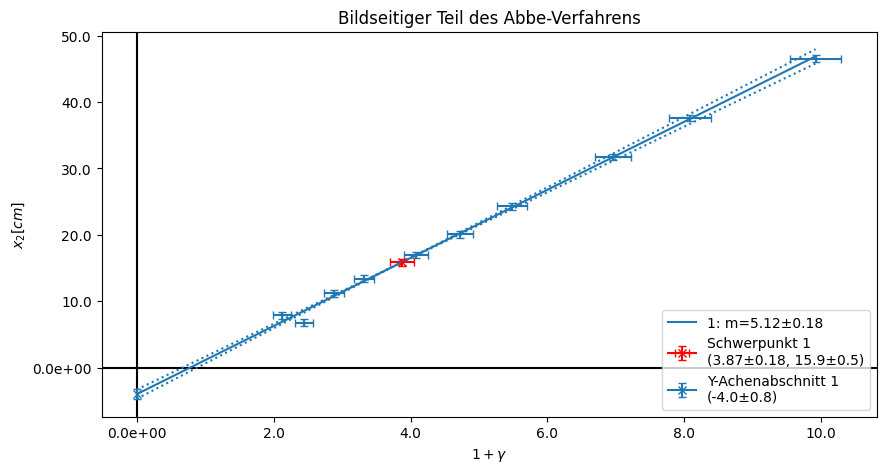

In [17]:
geraden_fit('a_daten_results2.csv', title = 'Bildseitiger Teil des Abbe-Verfahrens',
             y_label = r'$x_2[cm]$', x_label = r'$1+\gamma$', 
                save = True, focus_point = True, plot_x_inter = False, plot_errors=True, plot_y_inter=True, legendlocation = 'lower right'
            )

Berechnung für Aufgabe c:

In [18]:
print((1/5-1/5+5/5**2)**-1)

5.0


**Versuchsteil 2**

In [ ]:
df = pd.read_csv('e_f_g.csv')

# Alle Werte mit 0.028 multiplizieren
df *= 0.028  # Multipliziert jedes Element im DataFrame

# Neue Datei speichern (optional)
df.to_csv('fehler_e_f_g.csv', index=False)



Multiplikation abgeschlossen und Datei gespeichert.


**Folgenden code ignorieren**

In [60]:
import pandas as pd

def merge_csv_alternating(file1, file2, output_file):
    # CSV-Dateien einlesen
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    # Sicherstellen, dass beide Dateien die gleiche Struktur haben
    if df1.shape != df2.shape:
        raise ValueError("Die beiden Dateien haben unterschiedliche Strukturen!")
    
    # Leere Liste für die neue Reihenfolge
    merged_data = []
    
    # Alternierendes Mischen der Werte
    for col1, col2 in zip(df1.columns, df2.columns):
        merged_data.append(df1[col1])  # Werte aus Datei 1
        merged_data.append(df2[col2])  # Werte aus Datei 2
    
    # DataFrame neu anordnen
    merged_df = pd.DataFrame(merged_data).T
    
    # Datei speichern
    merged_df.to_csv(output_file, index=False)
    print(f"Zusammengeführte Datei gespeichert als {output_file}")

# Beispielaufruf mit Dateinamen
merge_csv_alternating("e_f_g.csv", "fehler_e_f_g.csv", "wertepaare_e_f_g.csv")

runden_und_speichern('wertepaare_e_f_g.csv')

input_filename = 'wertepaare_e_f_g_rounded.csv'

# Ausgabedateien für ungerade und gerade Felder
odd_output_filename = 'e_f_g_rounded.csv'
even_output_filename = 'fehler_e_f_g_rounded.csv'

# Öffnen der Eingabedatei zum Lesen
with open(input_filename, 'r') as infile:
    reader = csv.reader(infile)
    # Schreiben der Ausgabedateien
    with open(odd_output_filename, 'w', newline='') as odd_file, open(even_output_filename, 'w', newline='') as even_file:
        odd_writer = csv.writer(odd_file)
        even_writer = csv.writer(even_file)
        
        # Zeilen aus der Eingabedatei verarbeiten
        for row in reader:
            odd_row = row[::2]  # Alle ungeraden Stellen (0, 2, 4, ...)
            even_row = row[1::2]  # Alle geraden Stellen (1, 3, 5, ...)
            
            # Schreibe die Zeilen in die entsprechenden Dateien
            odd_writer.writerow(odd_row)
            even_writer.writerow(even_row)


Zusammengeführte Datei gespeichert als wertepaare_e_f_g.csv
Die gerundeten Daten wurden in der CSV-Datei "wertepaare_e_f_g_rounded.csv" gespeichert.


**Hier wirds wieder interessant**

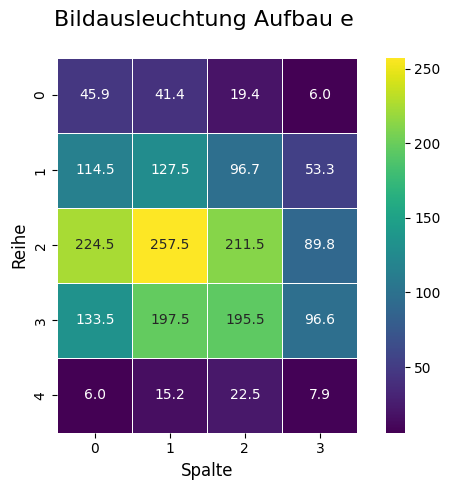

<Figure size 640x480 with 0 Axes>

In [63]:
U=2.5
# Create a 5x5 grid with NaN values for missing cells
grid = np.ones((5, 4))

# Set corners to NaN (missing)
# grid[0, 0] = np.nan  # Top-left
# grid[0, 4] = np.nan  # Top-right
# grid[4, 0] = np.nan  # Bottom-left
# grid[4, 4] = np.nan  # Bottom-right

# Set middle to NaN (missing)
# grid[2, 2] = np.nan  # Center

# load data from csv
data = np.loadtxt("e_f_g.csv", delimiter=",")

# Fill the grid with values
n = 0
for i in range(5):
    for j in range(4):
        if not np.isnan(grid[i, j]):
            grid[i, j] = data[n, 1] - U  # values corrected with Untergrundmessung
            n += 1

# Create a custom colormap that doesn't color NaN values
cmap = plt.cm.viridis.copy()
cmap.set_bad('white', 1.0)

# Create the heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(grid, cmap=cmap, annot=True, fmt=".1f", linewidths=.5, 
                square=True, mask=np.isnan(grid))

# Add title and labels
plt.title('Bildausleuchtung Aufbau e \n', fontsize=16)
plt.xlabel('Spalte', fontsize=12)
plt.ylabel('Reihe', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# If you need to save the plot
plt.savefig('e.png', dpi=300, bbox_inches='tight')

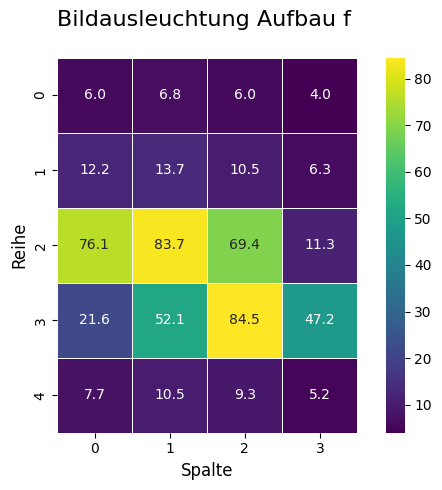

<Figure size 640x480 with 0 Axes>

In [49]:
U=2.5
# Create a 5x5 grid with NaN values for missing cells
grid = np.ones((5, 4))

# Set corners to NaN (missing)
# grid[0, 0] = np.nan  # Top-left
# grid[0, 4] = np.nan  # Top-right
# grid[4, 0] = np.nan  # Bottom-left
# grid[4, 4] = np.nan  # Bottom-right

# Set middle to NaN (missing)
# grid[2, 2] = np.nan  # Center

# load data from csv
data = np.loadtxt("e_f_g.csv", delimiter=",")

# Fill the grid with values
n = 0
for i in range(5):
    for j in range(4):
        if not np.isnan(grid[i, j]):
            grid[i, j] = data[n, 2] - U  # values corrected with Untergrundmessung
            n += 1

# Create a custom colormap that doesn't color NaN values
cmap = plt.cm.viridis.copy()
cmap.set_bad('white', 1.0)

# Create the heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(grid, cmap=cmap, annot=True, fmt=".1f", linewidths=.5, 
                square=True, mask=np.isnan(grid))

# Add title and labels
plt.title('Bildausleuchtung Aufbau f \n', fontsize=16)
plt.xlabel('Spalte', fontsize=12)
plt.ylabel('Reihe', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# If you need to save the plot
plt.savefig('f.png', dpi=300, bbox_inches='tight')

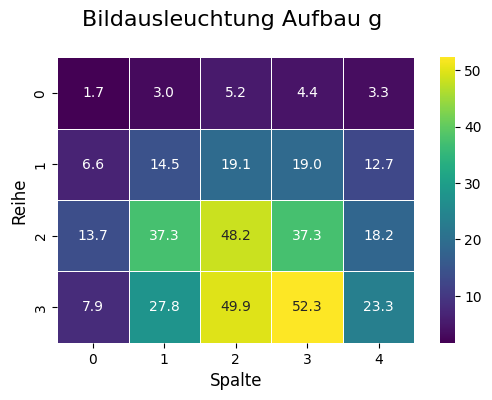

<Figure size 640x480 with 0 Axes>

In [48]:
U=2.5
# Create a 5x5 grid with NaN values for missing cells
grid = np.ones((4, 5))

# Set corners to NaN (missing)
# grid[0, 0] = np.nan  # Top-left
# grid[0, 4] = np.nan  # Top-right
# grid[4, 0] = np.nan  # Bottom-left
# grid[4, 4] = np.nan  # Bottom-right

# Set middle to NaN (missing)
# grid[2, 2] = np.nan  # Center

# load data from csv
data = np.loadtxt("e_f_g.csv", delimiter=",")

# Fill the grid with values
n = 0
for i in range(4):
    for j in range(5):
        if not np.isnan(grid[i, j]):
            grid[i, j] = data[n, 3] - U  # values corrected with Untergrundmessung
            n += 1

# Create a custom colormap that doesn't color NaN values
cmap = plt.cm.viridis.copy()
cmap.set_bad('white', 1.0)

# Create the heatmap
plt.figure(figsize=(6, 4))
ax = sns.heatmap(grid, cmap=cmap, annot=True, fmt=".1f", linewidths=.5, 
                square=True, mask=np.isnan(grid))

# Add title and labels
plt.title('Bildausleuchtung Aufbau g \n', fontsize=16)
plt.xlabel('Spalte', fontsize=12)
plt.ylabel('Reihe', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# If you need to save the plot
plt.savefig('g.png', dpi=300, bbox_inches='tight')

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

U = 2.5

# Create a 5x4 grid for the heatmap
grid = np.ones((5, 4))

# Load data from e_f_g.csv (original values)
data = np.loadtxt("e_f_g.csv", delimiter=",", skiprows=1)  # Skip the header row

# Load annotation data from fehler_e_f_g_rounded.csv (annotations)
annotations = np.loadtxt("fehler_e_f_g_rounded.csv", delimiter=",", skiprows=1)

# Reshape annotations to match the grid size (5x4)
annotations_reshaped = annotations[:, 1:]  # We take only the columns with annotations (e,f,g)
annotations_reshaped = annotations_reshaped.astype(str)  # Ensure that the annotations are strings

# Fill the grid with values from e_f_g.csv
n = 0
for i in range(5):
    for j in range(4):
        grid[i, j] = data[n, 1] - U  # Corrected values with Untergrundmessung
        n += 1

# Create a custom colormap that doesn't color NaN values
cmap = plt.cm.viridis.copy()
cmap.set_bad('white', 1.0)

# Create the heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(grid, cmap=cmap, annot=annotations_reshaped, fmt=".1f", linewidths=.5, 
                 square=True, mask=np.isnan(grid), cbar_kws={'label': 'Wert'})

# Add title and labels
plt.title('Bildausleuchtung Aufbau e \n', fontsize=16)
plt.xlabel('Spalte', fontsize=12)
plt.ylabel('Reihe', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# If you need to save the plot
plt.savefig('e_with_annotations.png', dpi=300, bbox_inches='tight')


ValueError: `data` and `annot` must have same shape.

<Figure size 600x500 with 0 Axes>